# Download PTB-XL data
As long as ptb-xl database is already downloaded, there is no need to run the command below.

In [1]:
!test -d "./input/physionet.org" && echo 'Folder already exists' || $(cat ./input/download_data.sh) -q -P ./input

Folder already exists


# ECG dataset
Data are stored as torch.utils.data.Dataset. There are 3 types of dataset: SignalDataset, CWTDataset, STFTDataset
1. SignalDataset: 12-lead ECGs with 1-d signals
2. CWTDataset: 12-lead ECGs with 2-d CWT matrix
3. STFTDataset: 12-lead ECGs with 2-d spectrogram

In [2]:
from codes.load_data import SignalDataset, CWTDataset, STFTDataset
import matplotlib.pyplot as plt
import os, cv2

In [3]:
def standard_normalization(sig):
    return (sig - sig.mean()) / sig.std()

def minmax_normalization(sig):
    return (sig - sig.min()) / (sig.max() - sig.min())

def both_normalization(sig):
    sig = standard_normalization(sig)
    sig = minmax_normalization(sig)
    return sig

In [4]:
import pandas as pd
import os, ast

df_dir = './input/physionet.org/files/ptb-xl/1.0.1'

df = pd.read_csv(os.path.join(df_dir, 'ptbxl_database.csv'))
df['scp_codes'] = df['scp_codes'].apply(lambda x: ast.literal_eval(x))
df['label'] = df['scp_codes'].apply(lambda x: set(x.keys()))
df_scp = pd.read_csv(os.path.join(df_dir, 'scp_statements.csv'))
df_scp.index = df_scp['Unnamed: 0'].values
df_scp = df_scp.iloc[:,1:]
df_scp['diagnostic'] = [idx_code if val == 1 else None for idx_code, val in zip(df_scp.index, df_scp['diagnostic'].values)]
df_scp['all'] = df_scp.index

# SignalDataset

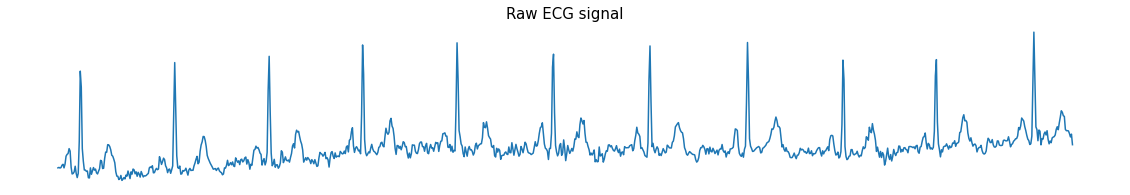

In [22]:
dataset = SignalDataset(df = df, df_scp = df_scp, base_dir = df_dir, sig_scaling = None)

file_idx = 0
lead_idx = 0

filename = dataset.files[file_idx]
signals, label = dataset[file_idx]
sig = signals[lead_idx]

plt.figure(figsize = (20,3))
plt.plot(sig)
plt.axis('off')
# plt.title(f'filename: {filename}, lead_idx: {lead_idx}')
plt.title(f'Raw ECG signal', fontsize = 15)
plt.savefig('./images/1d_signal.png')
plt.show()

# STFTDataset

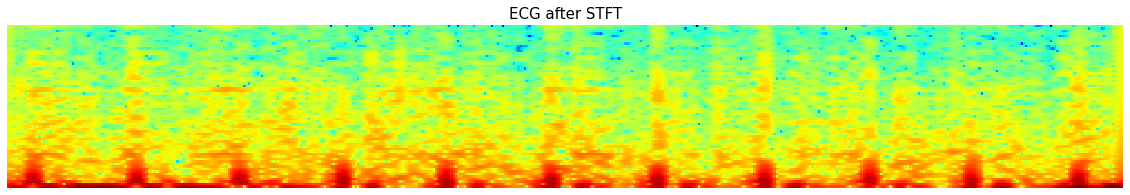

In [21]:
dataset = STFTDataset(df = df, df_scp = df_scp, base_dir = df_dir, fs = 500)

file_idx = 0
lead_idx = 0

filename = dataset.files[file_idx]
stfts, label = dataset[file_idx]
stft = stfts[lead_idx]

plt.figure(figsize = (20,3))
plt.pcolormesh(stft, cmap = 'jet')
# plt.title(f'filename: {filename}, lead_idx: {lead_idx}, spectrogram_shape: {stft.shape}')
plt.title(f'ECG after STFT', fontsize = 15)
plt.axis('off')
plt.savefig('images/2d_stft.png')
plt.show()

# CWTDataset

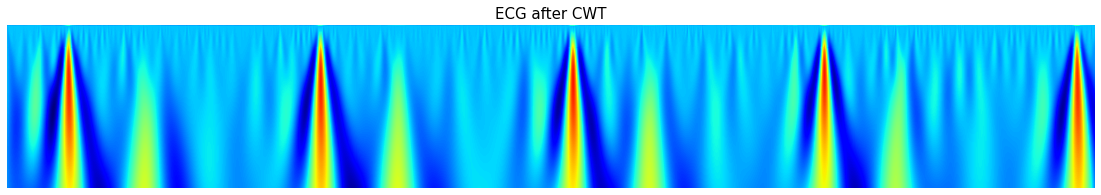

In [20]:
dataset = CWTDataset(df = df, df_scp = df_scp, base_dir = df_dir, fs = 500)

file_idx = 0
lead_idx = 0

filename = dataset.files[file_idx]
cwts, label = dataset[file_idx]
cwt = cwts[lead_idx]

plt.figure(figsize = (20,3))
plt.imshow(cwt[:,:2000], cmap = 'jet')
# plt.title(f'filename: {os.path.basename(filename)}, \nlead_idx: {lead_idx}, \ncwt_shape: {cwt.shape}')
plt.title(f'ECG after CWT', fontsize = 15)
plt.axis('off')
plt.savefig('images/2d_cwt.png')
plt.show()